In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

print(X[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


In [23]:
print(X[1].reshape(8,8))

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


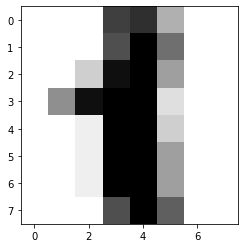

In [24]:
plt.figure()
plt.imshow(X[1].reshape(8,8),cmap=plt.cm.gray_r)
plt.show()

# Question 1

In [25]:
for i in range(0,10):
    print('Chiffre',i,':', sum(y==i))

Chiffre 0 : 178
Chiffre 1 : 182
Chiffre 2 : 177
Chiffre 3 : 183
Chiffre 4 : 181
Chiffre 5 : 182
Chiffre 6 : 181
Chiffre 7 : 179
Chiffre 8 : 174
Chiffre 9 : 180


Les classes sont à peu près équilibrées.

# Question 2

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=200)

# Question 3

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=7)

print(scores)

[0.86206897 1.         0.89655172 0.86206897 0.96428571 0.96428571
 0.89285714]


`scores` contient les scores de validation pour chacun des 7 couples d'échantillons apprentissage/validation considérés par la 7-CV. Le score final de la 7-CV est donc la moyenne de ces 7 scores.

In [59]:
print("Score de validation de la 7-CV de l'algorithme 5NN: ",  np.mean(scores))

Score de validation de la 7-CV de l'algorithme 5NN:  0.9203026038001408


# Question 4

In [60]:
from sklearn.model_selection import validation_curve
k_range = range(1,21)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(),
                                              X_train,
                                              y_train,
                                              "n_neighbors",
                                              k_range,
                                              cv=7)

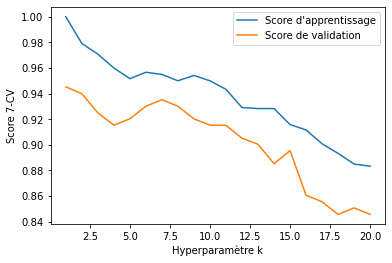

In [61]:
train_mean_score = np.mean(train_scores,axis=1)
valid_mean_score = np.mean(valid_scores,axis=1)

plt.plot(k_range, train_mean_score, label='Score d\'apprentissage')
plt.plot(k_range, valid_mean_score, label='Score de validation')
plt.xlabel("Hyperparamètre k")
plt.ylabel("Score 7-CV")
plt.legend()
plt.show()

In [62]:
k_best = k_range[np.argmax(valid_mean_score)]

Pour les grandes valeurs de k considérées, on voit que les scores d'apprentissage et de validation décroissent toutes les deux lorsque k croît. De plus, on sait que le biais de l'algorithme kNN augmente lorsque k croît. On en déduit qu'il y a sous-apprentissage (underfitting) pour les grandes valeurs de k. Il est donc inutile de considérer des valeurs k encore plus grandes.

# Question 5

In [63]:
from sklearn.model_selection import learning_curve

train_size_range = range(10,151,5)
train_sizes, train_scores, valid_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=k_best),
    X_train,y_train,train_sizes=train_size_range,
    cv=7)

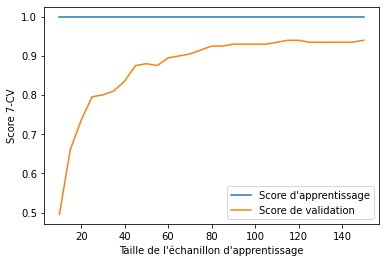

In [64]:
train_mean_score = np.mean(train_scores,axis=1)
valid_mean_score = np.mean(valid_scores,axis=1)

plt.plot(train_sizes, train_mean_score, label='Score d\'apprentissage')
plt.plot(train_sizes, valid_mean_score, label='Score de validation')
plt.xlabel("Taille de l'échanillon d'apprentissage")
plt.ylabel("Score 7-CV")
plt.legend()
plt.show()

On voit que la courbe de score de validation atteint ici un plateau (les résultats peuvent varier). Il est donc inutile de considérer des échantillons d'apprentissage plus grands.

# Question 6

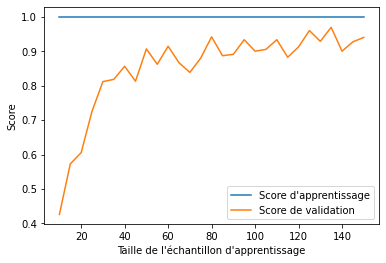

In [65]:
import numpy as np

knn_dict = {}
score_train = []
score_valid = []

for size in train_size_range:
   X_train_,X_valid_,y_train_,y_valid_ = train_test_split(X_train,y_train,train_size=size)
   knn_dict[size] = KNeighborsClassifier(n_neighbors=k_best).fit(X_train_,y_train_)
   score_train.append(knn_dict[size].score(X_train_,y_train_))
   score_valid.append(knn_dict[size].score(X_valid_,y_valid_))

plt.plot(train_size_range, score_train, label='Score d\'apprentissage')
plt.plot(train_size_range, score_valid, label='Score de validation')
plt.xlabel("Taille de l'échantillon d'apprentissage")
plt.ylabel("Score")
plt.legend()
plt.show()

Le score de la validation croisée est obtenue par la moyenne de plusieurs (ici 7) scores de validation simple. Elle présente donc beaucoup moins de fluctuations, et permet, ici pour la lecture des courbes d'apprentissage, de mieux saisir le comportement des courbes.

# Question 7

In [66]:
knn_best = KNeighborsClassifier(n_neighbors=k_best).fit(X_train,y_train)
print('Score de test:',knn_best.score(X_test,y_test))

Score de test: 0.9380087664370695


In [67]:
import pandas as pd
pd.crosstab(y_test,knn_best.predict(X_test))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,154,0,0,0,1,0,0,0,0,0
1,0,154,0,0,0,2,0,0,6,0
2,1,3,150,0,0,0,0,0,3,0
3,0,0,3,142,0,4,0,2,10,2
4,0,0,0,0,160,0,0,0,1,1
5,0,0,0,0,1,155,0,0,0,3
6,0,1,0,0,0,4,161,0,0,0
7,0,0,0,0,0,0,0,152,0,4
8,0,13,4,1,0,0,1,0,134,1


L'erreur la plus courante est ici le 8 qui est pris pour un 1 (les résultats peuvent varier).

# Question 8

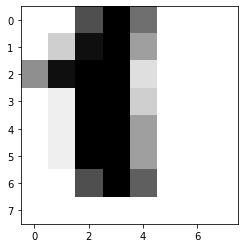

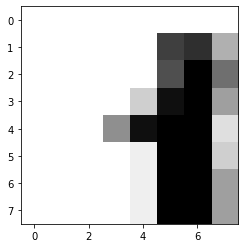

In [68]:
def shift_image(image,direction):
   dx, dy = direction
   x_shifted_image = np.zeros((8,8))
   if dx > 0:
      x_shifted_image[:,dx:]=image[:,:-dx]
   elif dx < 0:
      x_shifted_image[:,:dx]=image[:,-dx:]
   else:
      x_shifted_image=image 
   xy_shifted_image = np.zeros((8,8))
   if dy > 0:
      xy_shifted_image[:-dy]=x_shifted_image[dy:]
   elif dy < 0:
      xy_shifted_image[-dy:]=x_shifted_image[:dy]
   else:
      xy_shifted_image=x_shifted_image
   return xy_shifted_image

plt.figure()
plt.imshow(shift_image(X[1].reshape(8,8),np.array([-1,1])),cmap=plt.cm.gray_r)
plt.show()

plt.figure()
plt.imshow(shift_image(X[1].reshape(8,8),np.array([2,-1])),cmap=plt.cm.gray_r)
plt.show()

# Question 9

In [69]:
X_augmented = np.empty((0,64))
y_augmented = np.empty((0,1))

foo = [-1,0,1]
for dx in foo:
    for dy in foo:
       X_augmented = np.append(X_augmented,[shift_image(x.reshape(8,8),np.array([dx,dy])).reshape(64) for x in X],axis=0)
       y_augmented = np.append(y_augmented,y)

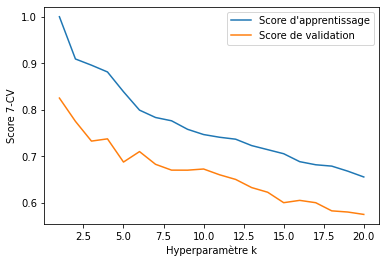

In [70]:
X_augmented_train, X_augmented_test, y_augmented_train, y_augmented_test = train_test_split(X_augmented,y_augmented,train_size=400)

from sklearn.model_selection import validation_curve
k_range = range(1,21)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(),
                                              X_augmented_train,
                                              y_augmented_train,
                                              "n_neighbors",
                                              k_range,
                                              cv=7)

train_mean_score = np.mean(train_scores,axis=1)
valid_mean_score = np.mean(valid_scores,axis=1)

plt.plot(k_range, train_mean_score, label='Score d\'apprentissage')
plt.plot(k_range, valid_mean_score, label='Score de validation')
plt.xlabel("Hyperparamètre k")
plt.ylabel("Score 7-CV")
plt.legend()
plt.show()

k_best = k_range[np.argmax(valid_mean_score)]

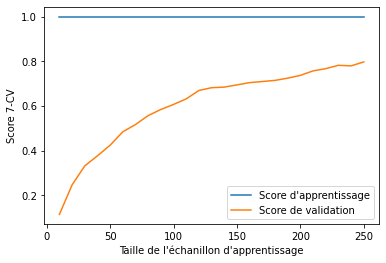

In [71]:
train_size_range = range(10,251,10)
train_sizes, train_scores, valid_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=k_best),
    X_augmented_train,y_augmented_train,train_sizes=train_size_range,
    cv=7)

train_mean_score = np.mean(train_scores,axis=1)
valid_mean_score = np.mean(valid_scores,axis=1)

plt.plot(train_sizes, train_mean_score, label='Score d\'apprentissage')
plt.plot(train_sizes, valid_mean_score, label='Score de validation')
plt.xlabel("Taille de l'échanillon d'apprentissage")
plt.ylabel("Score 7-CV")
plt.legend()
plt.show()

Le score d'apprentissage reste très élevé. Le score de test est nettement inférieur, continue d'augmenter avec avec la taille de l'échantille d'apprentissage. On est donc en situation de sur-apprentissage (overfitting). Il serait intéressant d'augmenter la taille de l'échantillon d'apprentissage. Travaillons avec un échantillon d'apprentissage/validation de taille 15000.

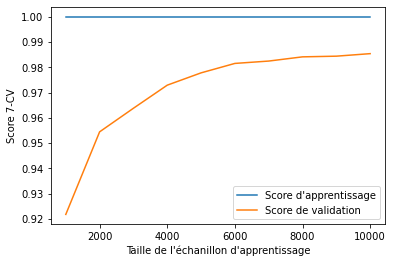

In [72]:
X_augmented_train, X_augmented_test, y_augmented_train, y_augmented_test = train_test_split(X_augmented,y_augmented,train_size=15000)

train_size_range = range(1000,10001,1000)
train_sizes, train_scores, valid_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=k_best),
    X_augmented_train,y_augmented_train,train_sizes=train_size_range,
    cv=7)

train_mean_score = np.mean(train_scores,axis=1)
valid_mean_score = np.mean(valid_scores,axis=1)

plt.plot(train_sizes, train_mean_score, label='Score d\'apprentissage')
plt.plot(train_sizes, valid_mean_score, label='Score de validation')
plt.xlabel("Taille de l'échanillon d'apprentissage")
plt.ylabel("Score 7-CV")
plt.legend()
plt.show()

La courbe du score de test semble (presque) atteindre un plateau. Il semble donc que nous ayons un échantillon d'apprentissage/validation suffisamment grand. Cronstruisons à présent notre estimateur kNN sur l'ensemble de cet échantillon, et examions son score sur l'échantillon de test.

In [73]:
print('Score de test:',KNeighborsClassifier(n_neighbors=k_best).fit(X_augmented_train,y_augmented_train).score(X_augmented_test,y_augmented_test))

Score de test: 0.9829497016197783


Le prédicteur obtenu est meilleur.